## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [11]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [1e-2, 1e-3, 1e-4]
redice_lr_patient = [5, 10, 15]

In [13]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor,
                                  min_lr=1e-12,
                                  monitor='val_loss',
                                  patience=reduce_patient,
                                  verbose=1
                                 )
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.01, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

Epoch 13/25
50000/50000 [==============================] - 4s 85us/step - loss: 2.2195 - acc: 0.2639 - val_loss: 2.2383 - val_acc: 0.2610
Epoch 14/25
50000/50000 [==============================] - 4s 90us/step - loss: 2.1985 - acc: 0.2692 - val_loss: 2.2194 - val_acc: 0.2671
Epoch 15/25
50000/50000 [==============================] - 4s 85us/step - loss: 2.1801 - acc: 0.2734 - val_loss: 2.2029 - val_acc: 0.2695
Epoch 16/25
50000/50000 [==============================] - 4s 86us/step - loss: 2.1610 - acc: 0.2784 - val_loss: 2.1868 - val_acc: 0.2736
Epoch 17/25
50000/50000 [==============================] - 5s 102us/step - loss: 2.1451 - acc: 0.2809 - val_loss: 2.1725 - val_acc: 0.2744
Epoch 18/25
50000/50000 [==============================] - 5s 98us/step - loss: 2.1299 - acc: 0.2848 - val_loss: 2.1585 - val_acc: 0.2790
Epoch 19/25
50000/50000 [==============================] - 4s 86us/step - loss: 2.1150 - acc: 0.2882 - val_loss: 2.1455 - val_acc: 0.2830
Epoch 20/25
50000/50000 [========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 128us/step - loss: 3.0853 - acc: 0.0918 - val_loss: 2.9320 - val_acc: 0.1142
Epoch 2/25
50000/50000 [==============================] - 4s 85us/step - loss: 2.8977 - acc: 0.1165 - val_loss: 2.7949 - val_acc: 0.1419
Epoch 3/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.7477 - acc: 0.1455 - val_loss: 2.6944 - val_acc: 0.1619
Epoch 4/25
50000/50000 [==============================] - 4s 83us/step - loss: 2.6396 - acc: 0.1662 - val_loss: 2.6046 - val_acc: 0.1796
Epoch 5/25
50000/50000 [==============================] - 4s 83us/step - loss: 2.5574 - acc: 0.1838 - val_loss: 2.5276 - val_acc: 0.1908
Epoch 6/25
50000/50000 [==============================] - 4s 84us/step - loss: 2.4921 - acc: 0.1979 - val_loss: 2.4627 - val_acc: 0.2038
Epoch 7/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.4371 - acc: 0.2093 - val_loss: 2.4095 - val_ac

50000/50000 [==============================] - 4s 84us/step - loss: 2.0448 - acc: 0.3093 - val_loss: 2.0921 - val_acc: 0.2908
Epoch 25/25
50000/50000 [==============================] - 5s 93us/step - loss: 2.0341 - acc: 0.3132 - val_loss: 2.0824 - val_acc: 0.2934
Numbers of exp: 5, reduce_factor: 0.00, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 5s 92us/step - loss: 2.3025 - acc: 0.2421 - val_loss: 2.3121 - val_acc: 0.2445
Epoch 12/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.2749 - acc: 0.2493 - val_loss: 2.2881 - val_acc: 0.2515
Epoch 13/25
50000/50000 [==============================] - 5s 102us/step - loss: 2.2497 - acc: 0.2543 - val_loss: 2.2666 - val_acc: 0.2560
Epoch 14/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.2277 - acc: 0.2594 - val_loss: 2.2464 - val_acc: 0.2607
Epoch 15/25
50000/50000 [==============================] - 5s 109us/step - loss: 2.2064 - acc: 0.2651 - val_loss: 2.2279 - val_acc: 0.2643
Epoch 16/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.1873 - acc: 0.2702 - val_loss: 2.2112 - val_acc: 0.2682
Epoch 17/25
50000/50000 [==============================] - 4s 90us/step - loss: 2.1682 - acc: 0.2752 - val_loss: 2.1944 - val_acc: 0.2721
Epoch 18/25
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 161us/step - loss: 2.9925 - acc: 0.1077 - val_loss: 2.9023 - val_acc: 0.1235
Epoch 2/25
50000/50000 [==============================] - 5s 90us/step - loss: 2.8381 - acc: 0.1288 - val_loss: 2.7751 - val_acc: 0.1522
Epoch 3/25
50000/50000 [==============================] - 4s 84us/step - loss: 2.7058 - acc: 0.1527 - val_loss: 2.6866 - val_acc: 0.1699
Epoch 4/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.6105 - acc: 0.1697 - val_loss: 2.6096 - val_acc: 0.1824
Epoch 5/25
50000/50000 [==============================] - 3s 69us/step - loss: 2.5339 - acc: 0.1835 - val_loss: 2.5401 - val_acc: 0.1934
Epoch 6/25
50000/50000 [==============================] - 3s 69us/step - loss: 2.4718 - acc: 0.1964 - val_loss: 2.4800 - val_acc: 0.2024
Epoch 7/25
50000/50000 [==============================] - 3s 69us/step - loss: 2.4215 - acc: 0.2057 - val_loss: 2.4306 - val_ac

50000/50000 [==============================] - 4s 74us/step - loss: 0.7869 - acc: 0.7390 - val_loss: 1.2929 - val_acc: 0.5507
Epoch 24/25
50000/50000 [==============================] - 4s 81us/step - loss: 0.7834 - acc: 0.7395 - val_loss: 1.2938 - val_acc: 0.5509
Epoch 25/25
50000/50000 [==============================] - 4s 75us/step - loss: 0.7798 - acc: 0.7416 - val_loss: 1.2943 - val_acc: 0.5500
Numbers of exp: 10, reduce_factor: 0.01, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_34 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_lay

50000/50000 [==============================] - 4s 77us/step - loss: 1.4423 - acc: 0.4997 - val_loss: 1.5942 - val_acc: 0.4422
Epoch 11/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.4237 - acc: 0.5054 - val_loss: 1.5812 - val_acc: 0.4465
Epoch 12/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.4077 - acc: 0.5122 - val_loss: 1.5713 - val_acc: 0.4504
Epoch 13/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.3926 - acc: 0.5179 - val_loss: 1.5667 - val_acc: 0.4524
Epoch 14/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3776 - acc: 0.5233 - val_loss: 1.5557 - val_acc: 0.4569
Epoch 15/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.3643 - acc: 0.5281 - val_loss: 1.5543 - val_acc: 0.4588
Epoch 16/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.3519 - acc: 0.5326 - val_loss: 1.5505 - val_acc: 0.4599
Epoch 17/25
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 150us/step - loss: 2.1554 - acc: 0.2814 - val_loss: 1.9977 - val_acc: 0.3323
Epoch 2/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.7568 - acc: 0.3874 - val_loss: 1.8303 - val_acc: 0.3708
Epoch 3/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.6563 - acc: 0.4202 - val_loss: 1.7338 - val_acc: 0.3960
Epoch 4/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.5984 - acc: 0.4413 - val_loss: 1.6906 - val_acc: 0.4109
Epoch 5/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.5559 - acc: 0.4549 - val_loss: 1.6602 - val_acc: 0.4215
Epoch 6/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.5219 - acc: 0.4678 - val_loss: 1.6337 - val_acc: 0.4312
Epoch 7/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.4925 - acc: 0.4794 - val_loss: 1.6168 - val_a

50000/50000 [==============================] - 4s 82us/step - loss: 1.2497 - acc: 0.5706 - val_loss: 1.5130 - val_acc: 0.4760
Epoch 25/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.2407 - acc: 0.5754 - val_loss: 1.5077 - val_acc: 0.4768
Numbers of exp: 15, reduce_factor: 0.00, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_49 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 4s 83us/step - loss: 1.4185 - acc: 0.5089 - val_loss: 1.5794 - val_acc: 0.4527
Epoch 12/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.4008 - acc: 0.5147 - val_loss: 1.5705 - val_acc: 0.4527
Epoch 13/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.3844 - acc: 0.5202 - val_loss: 1.5675 - val_acc: 0.4569
Epoch 14/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.3704 - acc: 0.5249 - val_loss: 1.5554 - val_acc: 0.4597
Epoch 15/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.3566 - acc: 0.5314 - val_loss: 1.5528 - val_acc: 0.4612
Epoch 16/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.3424 - acc: 0.5372 - val_loss: 1.5450 - val_acc: 0.4628
Epoch 17/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.3300 - acc: 0.5409 - val_loss: 1.5461 - val_acc: 0.4649
Epoch 18/25
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 14s 270us/step - loss: 1.7966 - acc: 0.3767 - val_loss: 2.3363 - val_acc: 0.2966
Epoch 2/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.5306 - acc: 0.4600 - val_loss: 5.3252 - val_acc: 0.1732
Epoch 3/25
50000/50000 [==============================] - 4s 89us/step - loss: 1.4260 - acc: 0.4949 - val_loss: 2.8886 - val_acc: 0.2365
Epoch 4/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.3542 - acc: 0.5233 - val_loss: 2.5527 - val_acc: 0.2597
Epoch 5/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.2944 - acc: 0.5444 - val_loss: 1.8456 - val_acc: 0.3797
Epoch 6/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.2382 - acc: 0.5624 - val_loss: 1.9985 - val_acc: 0.3063
Epoch 7/25
50000/50000 [==============================] - 8s 161us/step - loss: 1.1927 - acc: 0.5800 - val_loss: 1.8927 - v

50000/50000 [==============================] - 5s 102us/step - loss: 1.4106 - acc: 0.5118 - val_loss: 1.5988 - val_acc: 0.4495
Epoch 24/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.3989 - acc: 0.5168 - val_loss: 1.5915 - val_acc: 0.4495
Epoch 25/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3884 - acc: 0.5215 - val_loss: 1.5858 - val_acc: 0.4540
Numbers of exp: 20, reduce_factor: 0.01, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_64 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_

50000/50000 [==============================] - 5s 94us/step - loss: 1.6595 - acc: 0.4221 - val_loss: 1.7628 - val_acc: 0.3930
Epoch 11/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.6337 - acc: 0.4304 - val_loss: 1.7455 - val_acc: 0.4007
Epoch 12/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.6087 - acc: 0.4373 - val_loss: 1.7302 - val_acc: 0.4020
Epoch 13/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5880 - acc: 0.4449 - val_loss: 1.7114 - val_acc: 0.4071
Epoch 14/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.5665 - acc: 0.4522 - val_loss: 1.6977 - val_acc: 0.4126
Epoch 15/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.5473 - acc: 0.4588 - val_loss: 1.6859 - val_acc: 0.4171
Epoch 16/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5298 - acc: 0.4658 - val_loss: 1.6768 - val_acc: 0.4202
Epoch 17/25
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 180us/step - loss: 2.4924 - acc: 0.1951 - val_loss: 2.3271 - val_acc: 0.2423
Epoch 2/25
50000/50000 [==============================] - 4s 73us/step - loss: 2.1508 - acc: 0.2759 - val_loss: 2.1617 - val_acc: 0.2811
Epoch 3/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.0012 - acc: 0.3158 - val_loss: 2.0558 - val_acc: 0.3090
Epoch 4/25
50000/50000 [==============================] - 4s 74us/step - loss: 1.9061 - acc: 0.3442 - val_loss: 1.9710 - val_acc: 0.3339
Epoch 5/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.8364 - acc: 0.3652 - val_loss: 1.9023 - val_acc: 0.3498
Epoch 6/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.7823 - acc: 0.3835 - val_loss: 1.8579 - val_acc: 0.3681
Epoch 7/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.7378 - acc: 0.3982 - val_loss: 1.8189 - val_ac

50000/50000 [==============================] - 4s 86us/step - loss: 1.4099 - acc: 0.5141 - val_loss: 1.6008 - val_acc: 0.4477
Epoch 25/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.3982 - acc: 0.5182 - val_loss: 1.5946 - val_acc: 0.4466
Numbers of exp: 25, reduce_factor: 0.00, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_79 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizat

50000/50000 [==============================] - 4s 87us/step - loss: 1.6208 - acc: 0.4378 - val_loss: 1.7148 - val_acc: 0.3996
Epoch 12/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.5975 - acc: 0.4468 - val_loss: 1.6996 - val_acc: 0.4045
Epoch 13/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.5761 - acc: 0.4528 - val_loss: 1.6859 - val_acc: 0.4096
Epoch 14/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.5567 - acc: 0.4598 - val_loss: 1.6738 - val_acc: 0.4124
Epoch 15/25
50000/50000 [==============================] - 4s 90us/step - loss: 1.5379 - acc: 0.4665 - val_loss: 1.6689 - val_acc: 0.4170
Epoch 16/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.5215 - acc: 0.4709 - val_loss: 1.6546 - val_acc: 0.4242
Epoch 17/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.5048 - acc: 0.4769 - val_loss: 1.6461 - val_acc: 0.4247
Epoch 18/25
50000/50000 [===================

MemoryError: 

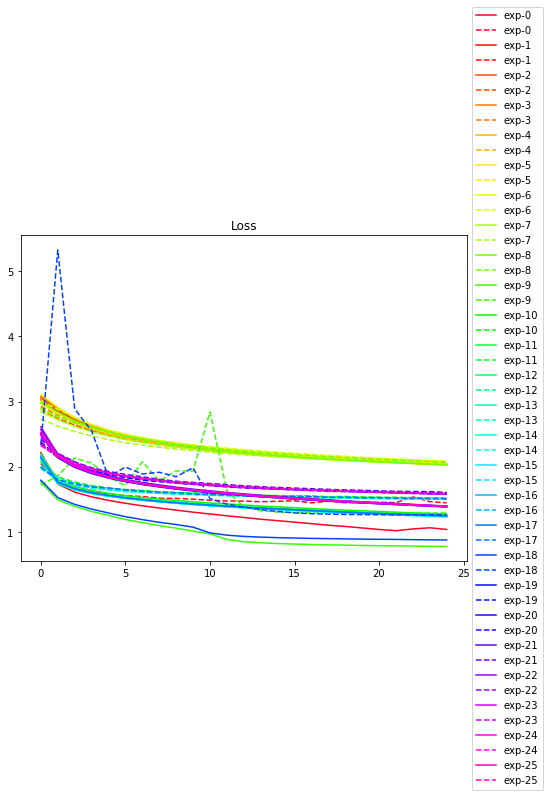

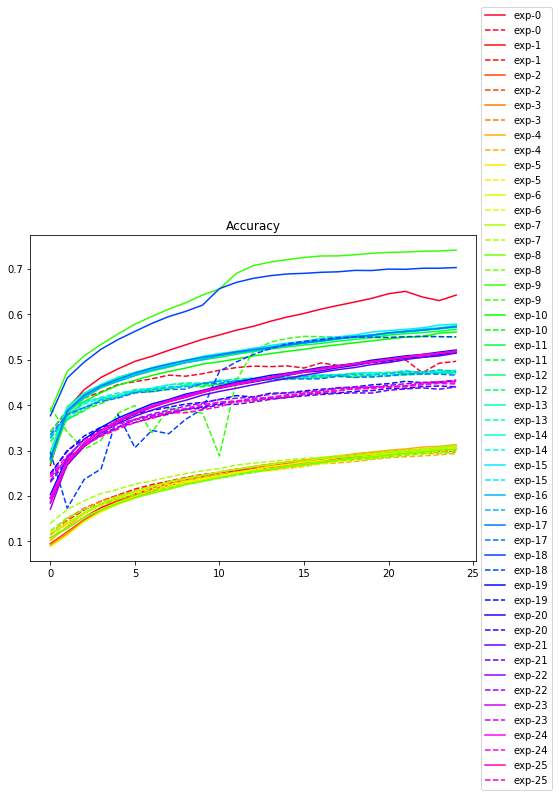

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()